In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5
from sklearn.datasets import make_blobs

%matplotlib inline

/home/youngdp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/youngdp/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

/home/youngdp/anaconda2/lib/python2.7/site-packages/nbashots/api.py:306: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


201939

In [3]:

# "shots" is the defualt paramter value
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

PERSON_ID DISPLAY_LAST_COMMA_FIRST
0       1505       Abdul-Wahad, Tariq
1        949     Abdur-Rahim, Shareef
2     203518            Abrines, Alex
3     101165              Acker, Alex
4     203112              Acy, Quincy

In [4]:
players_with_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
PERSON_ID                   1587 non-null int64
DISPLAY_LAST_COMMA_FIRST    1587 non-null object
dtypes: int64(1), object(1)
memory usage: 24.9+ KB


In [5]:

all_data = nba.get_all_player_ids("all_data")
all_data.head()

PERSON_ID DISPLAY_LAST_COMMA_FIRST   DISPLAY_FIRST_LAST  ROSTERSTATUS  \
0      76001          Abdelnaby, Alaa       Alaa Abdelnaby             0   
1      76002         Abdul-Aziz, Zaid      Zaid Abdul-Aziz             0   
2      76003     Abdul-Jabbar, Kareem  Kareem Abdul-Jabbar             0   
3         51      Abdul-Rauf, Mahmoud   Mahmoud Abdul-Rauf             0   
4       1505       Abdul-Wahad, Tariq    Tariq Abdul-Wahad             0   

   FROM_YEAR  TO_YEAR                   PLAYERCODE  TEAM_ID TEAM_CITY  \
0       1990     1994       HISTADD_alaa_abdelnaby        0             
1       1968     1977      HISTADD_zaid_abdul-aziz        0             
2       1969     1988  HISTADD_kareem_abdul-jabbar        0             
3       1990     2000           mahmoud_abdul-rauf        0             
4       1997     2003            tariq_abdul-wahad        0             

  TEAM_NAME TEAM_ABBREVIATION TEAM_CODE GAMES_PLAYED_FLAG  
0                                                       Y  
1                                                       Y  
2                                                       Y  
3                                                       Y  
4                                                       Y

In [6]:

curry_logs = nba.PlayerLog(curry_id)

In [7]:
curry_logs.url_paramaters

{'LeagueID': '00',
 'PlayerID': 201939,
 'Season': '2016-17',
 'SeasonType': 'Regular Season'}

In [8]:
shots = nba.Shots()

In [9]:

curry_shots_df = nba.Shots(curry_id).get_shots()

In [10]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

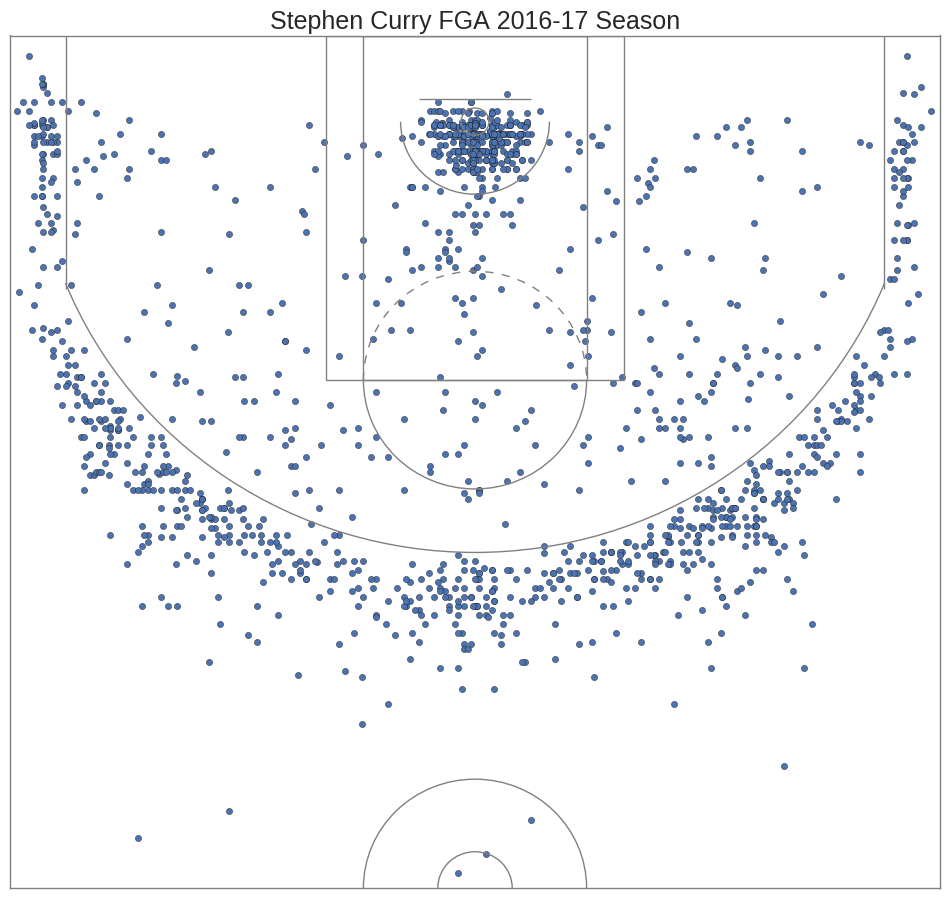

In [11]:
# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [12]:
from sklearn.cluster import KMeans

In [13]:
curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())
print ""

In [14]:
X = curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())

In [15]:
X.head()

LOC_X  LOC_Y
0    130    257
1    189    174
2    159    229
3    163    141
4     -9    267

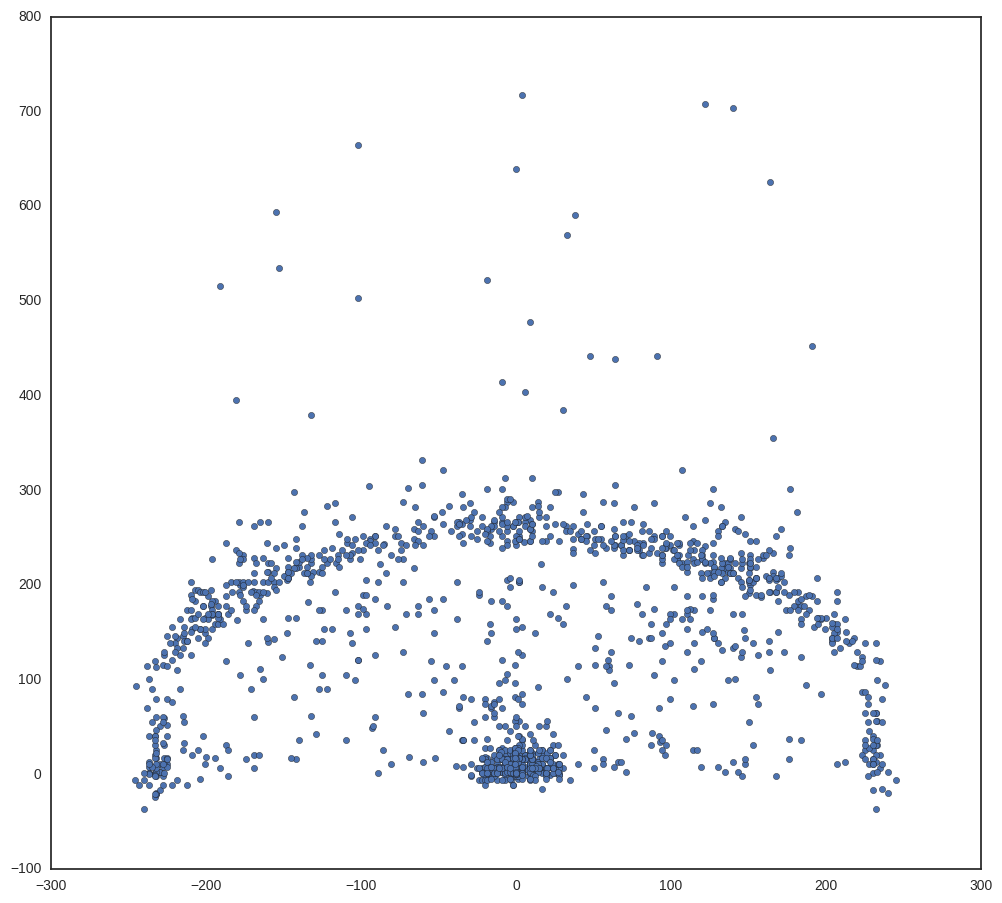

In [16]:
plt.scatter(X.LOC_X, X.LOC_Y)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


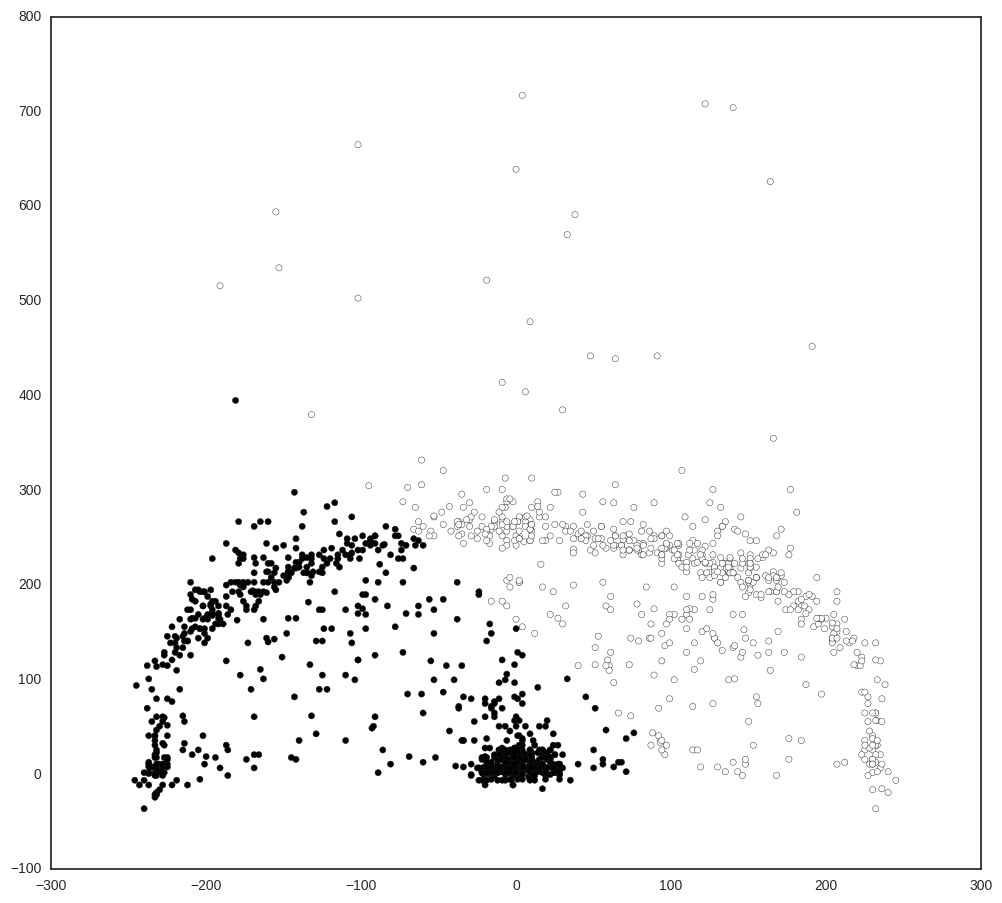

In [18]:
plt.scatter(X.LOC_X, X.LOC_Y, c=labels);
plt.show()

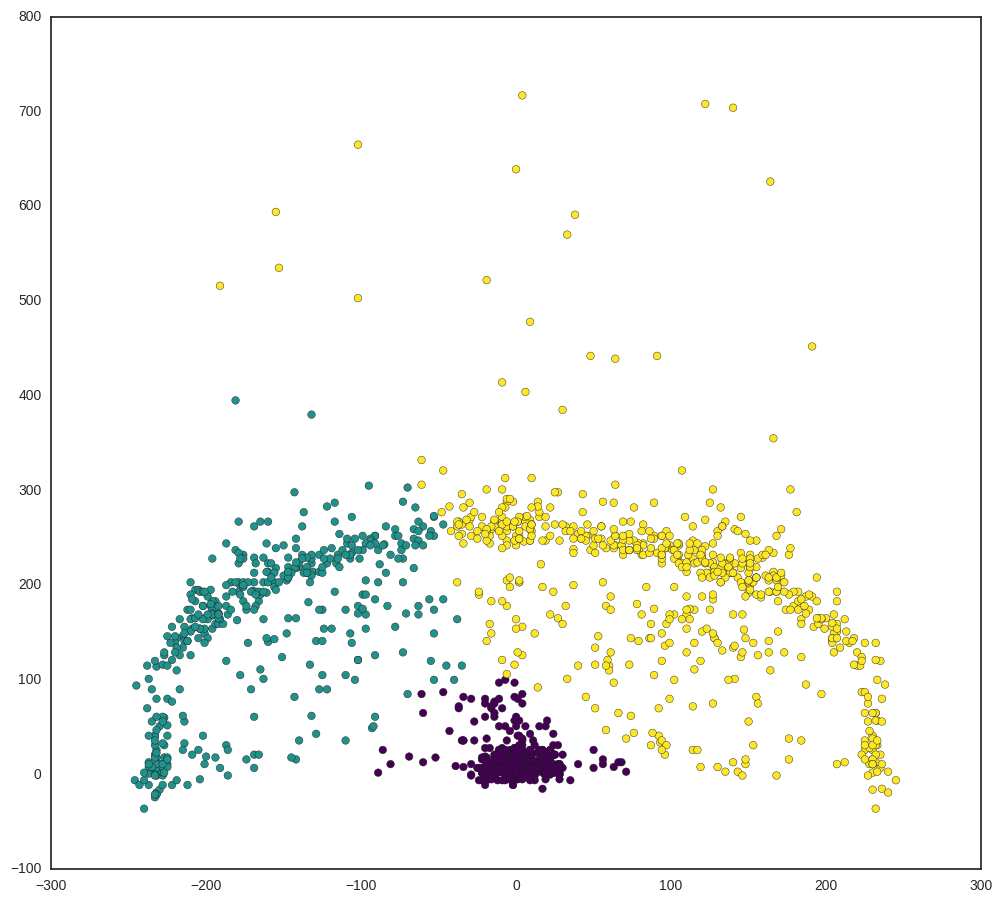

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()


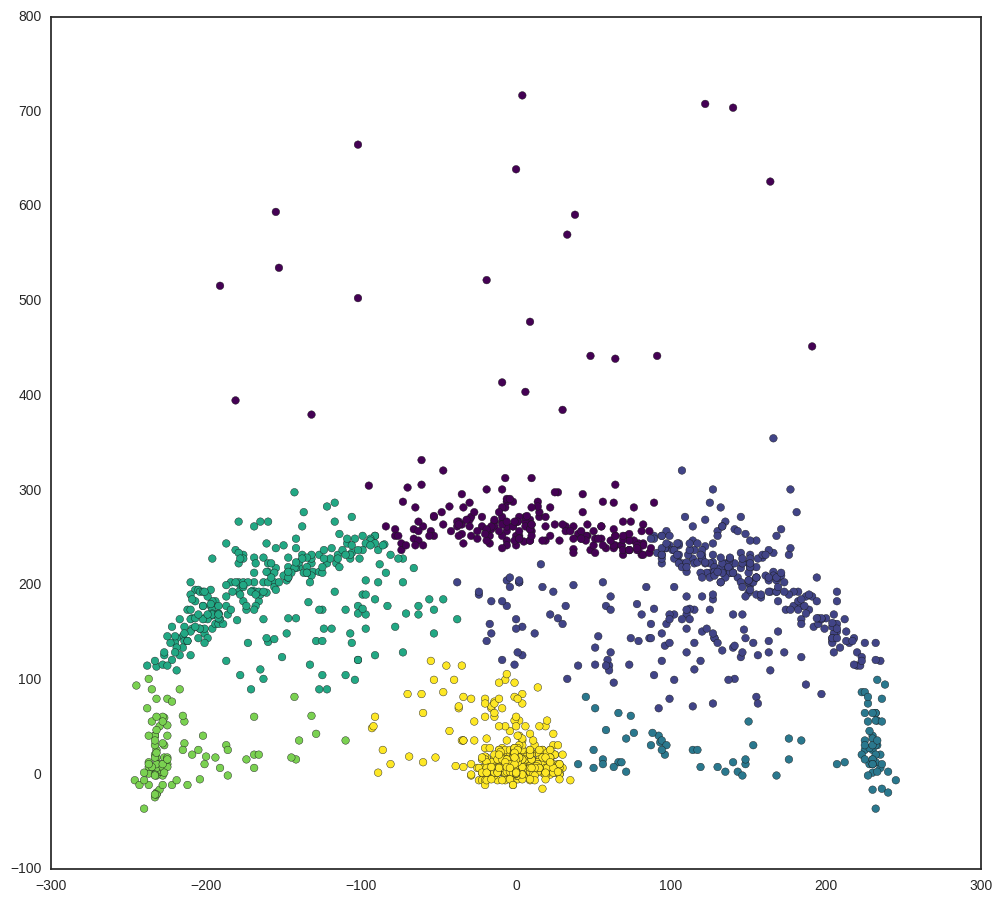

In [20]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",
                                            connectivity=None,
                                            n_clusters=6)
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

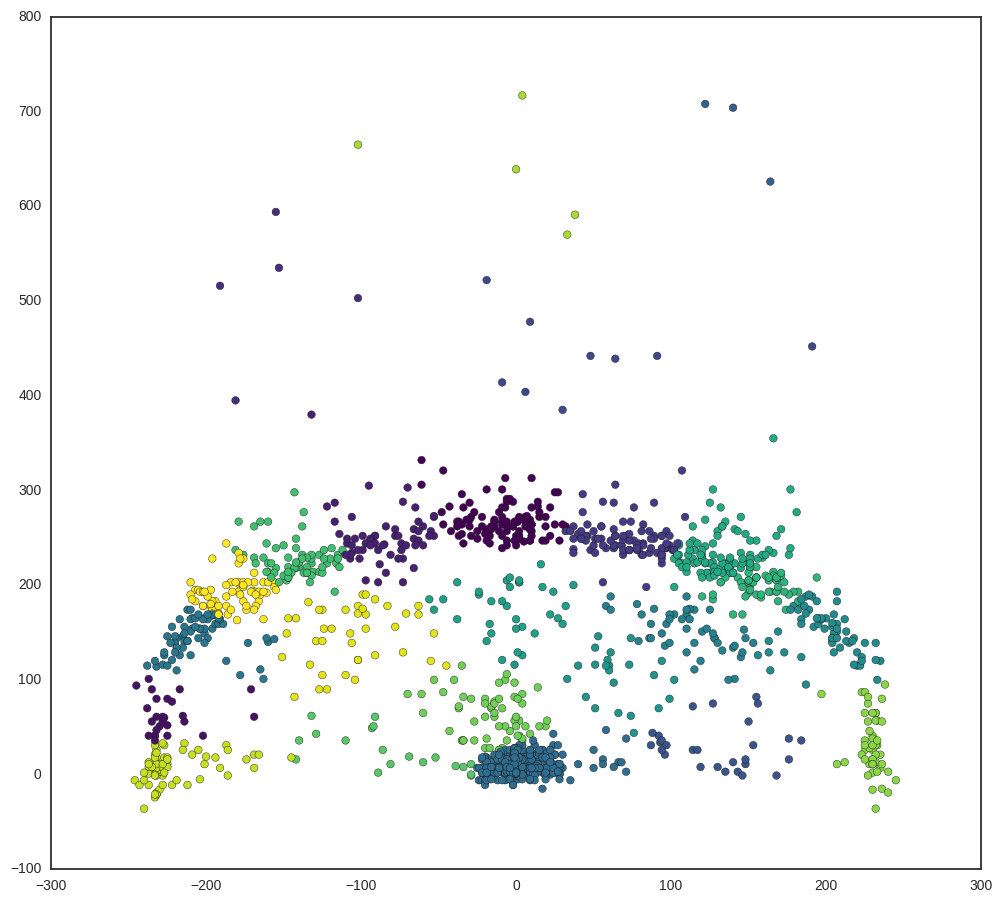

In [21]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


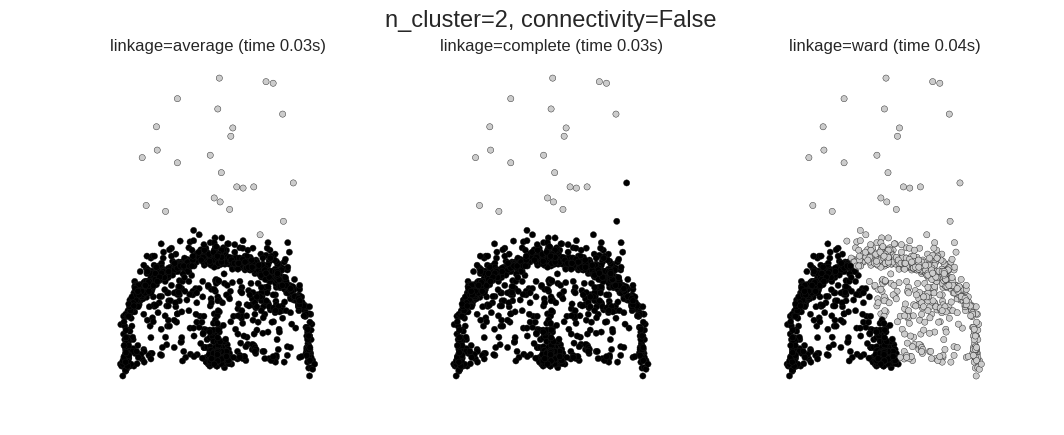

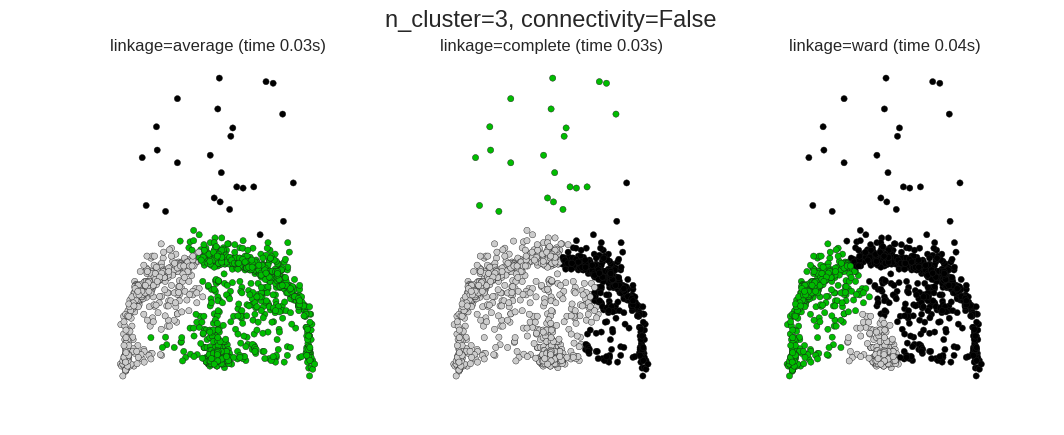

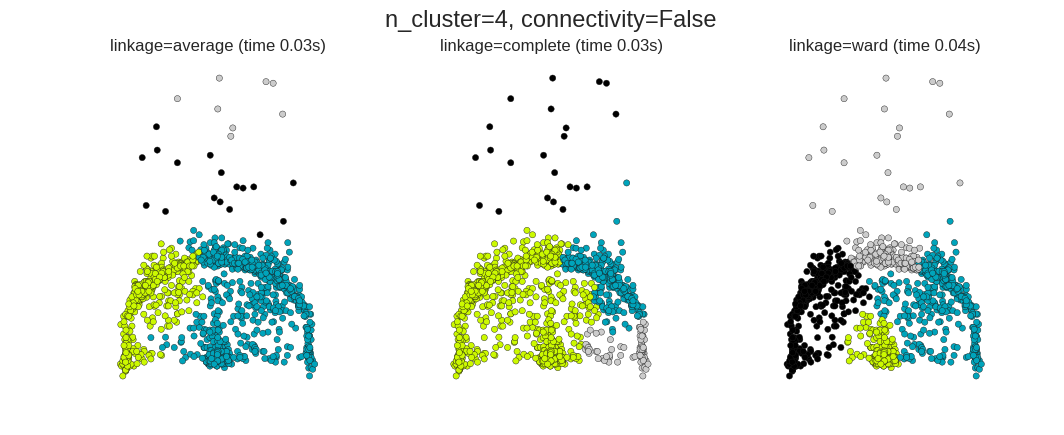

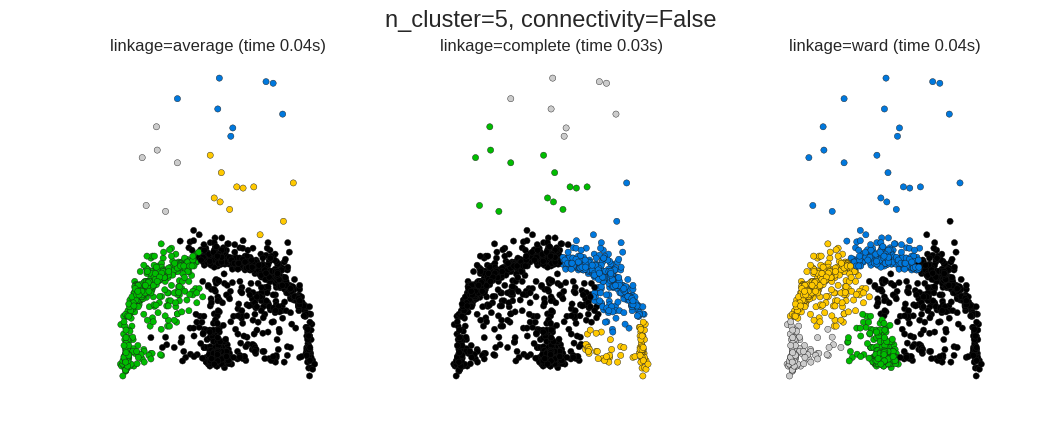

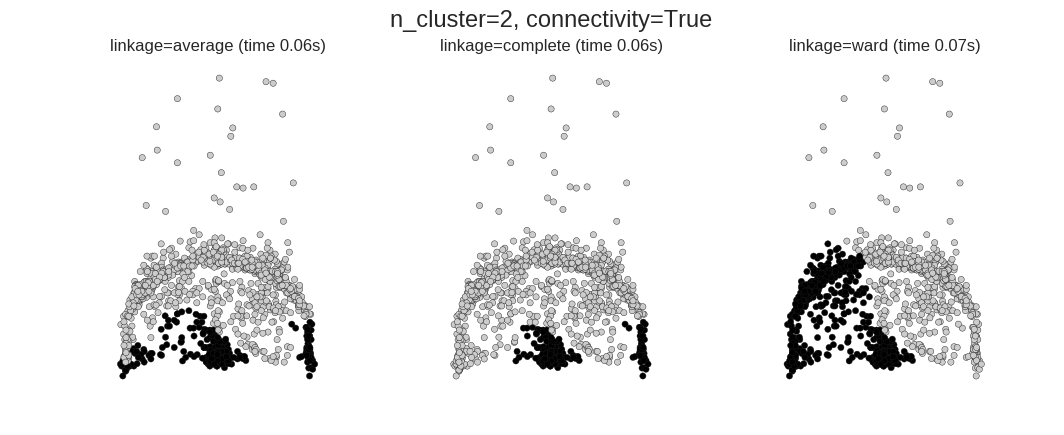

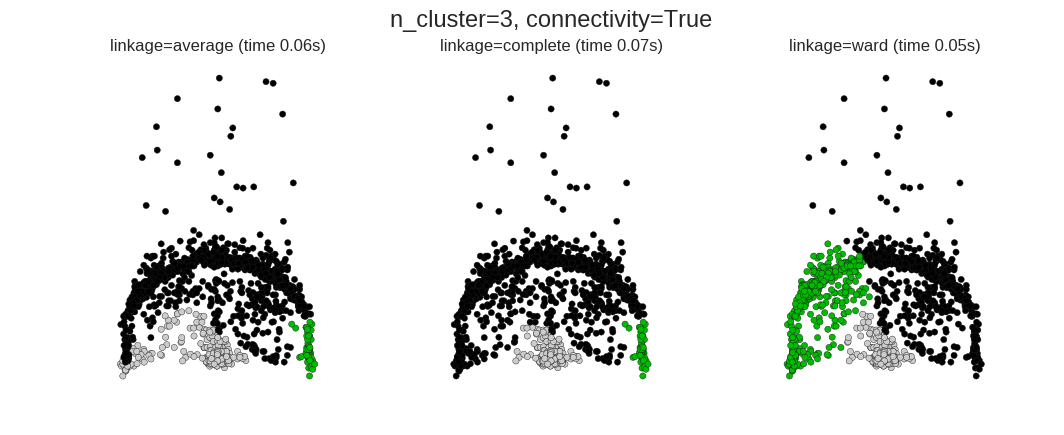

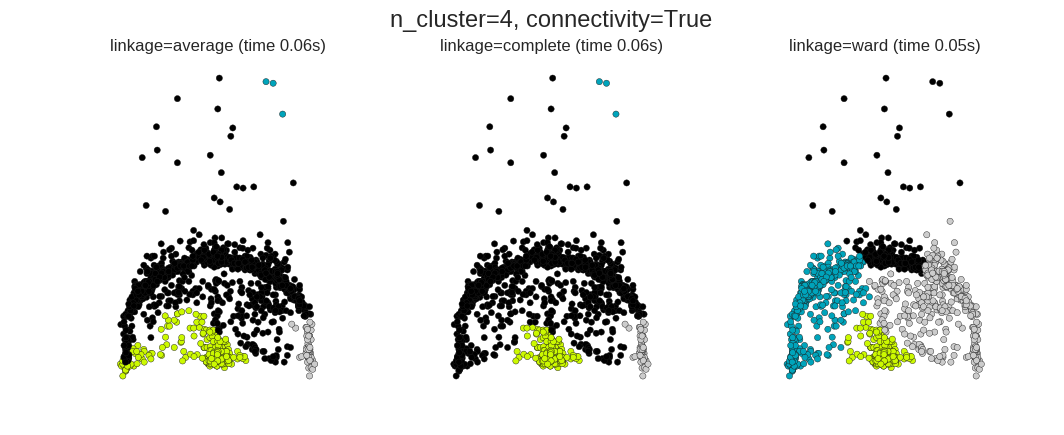

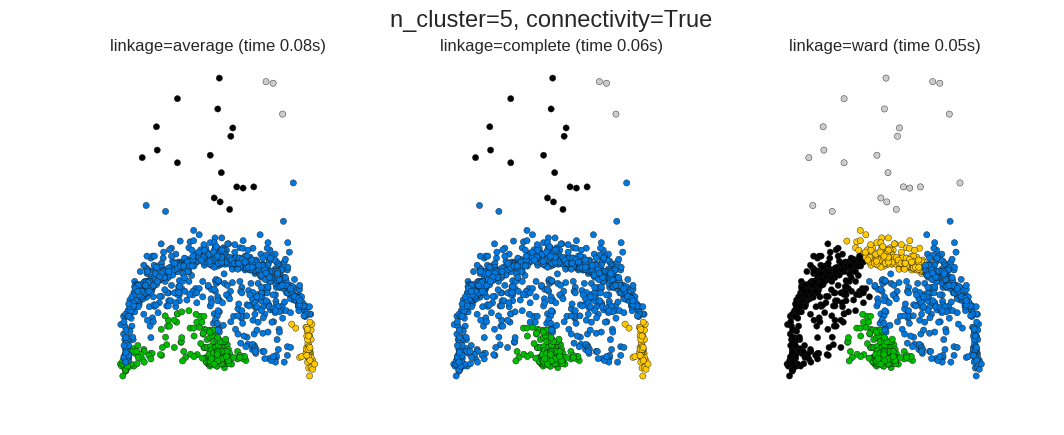

In [22]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()


In [23]:
"""
What is the purpose of clustering the map of Curry's shots? 
"""



"\nWhat is the purpose of clustering the map of Curry's shots? \n"

In [24]:
howard_id = nba.get_player_id("Howard, Dwight")[0]
howard_id

2730

In [25]:
howard_shots = nba.Shots(howard_id).get_shots()

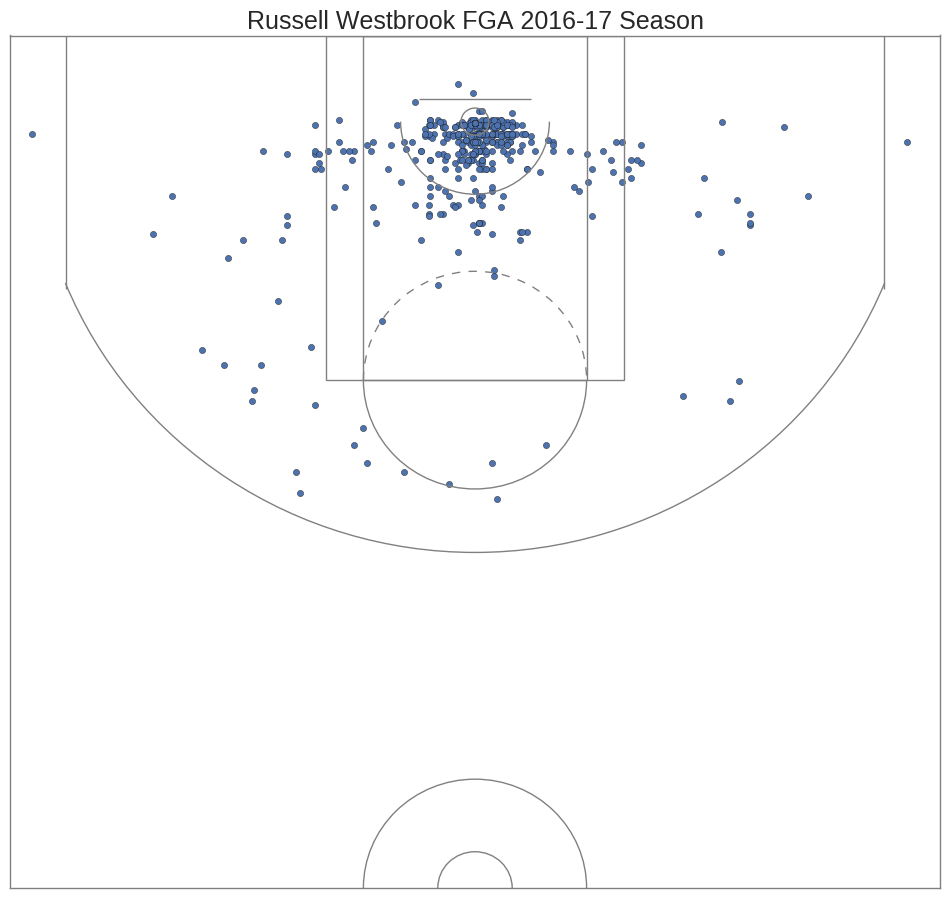

In [26]:
nba.shot_chart(howard_shots.LOC_X, howard_shots.LOC_Y,
              title="Russell Westbrook FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [27]:
combined = pd.concat([curry_shots_df, howard_shots])

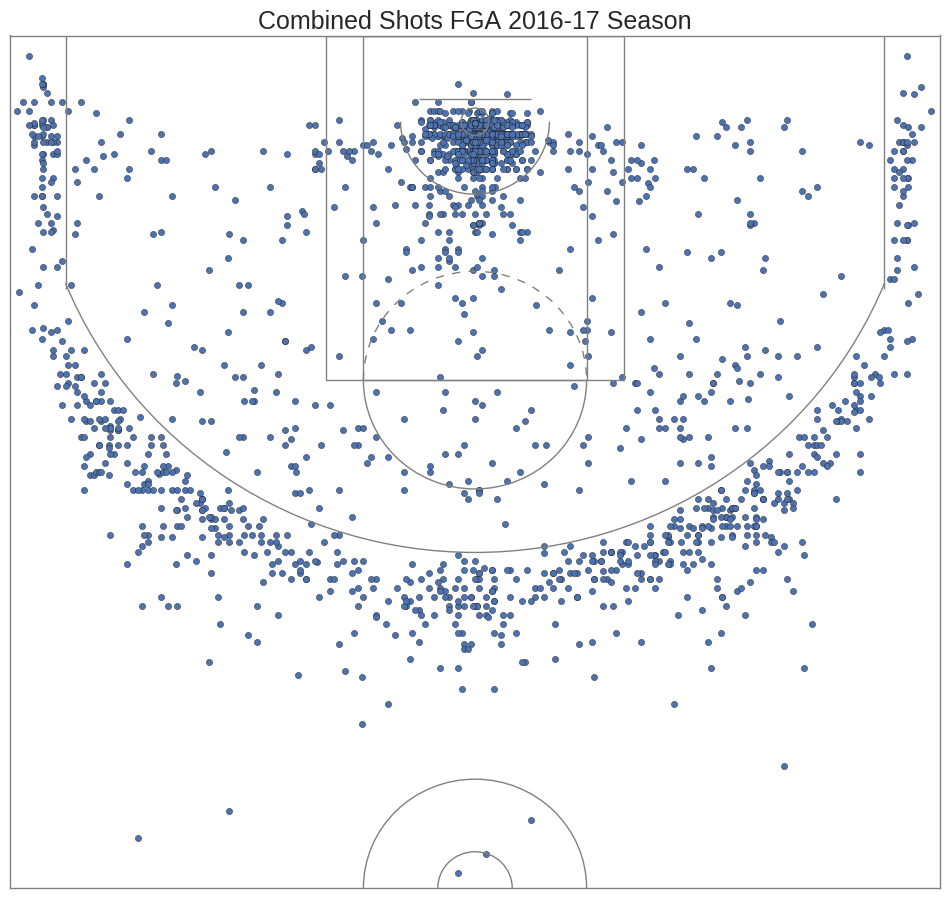

In [28]:
nba.shot_chart(combined.LOC_X, combined.LOC_Y,
              title="Combined Shots FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [29]:
X = combined.LOC_X.to_frame().join(combined.LOC_Y.to_frame())
X.head()

LOC_X  LOC_Y
0    130    257
0    130      1
0      0    257
0      0      1
1    189    174

/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 64 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 64 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


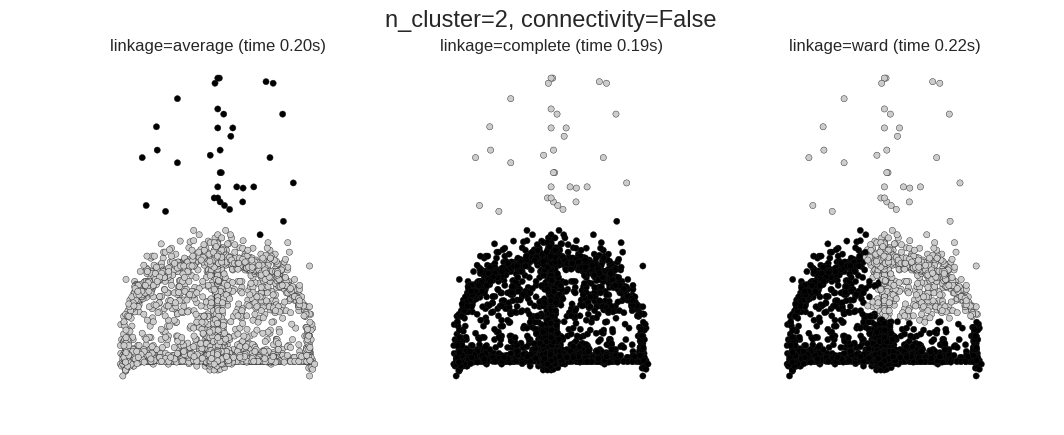

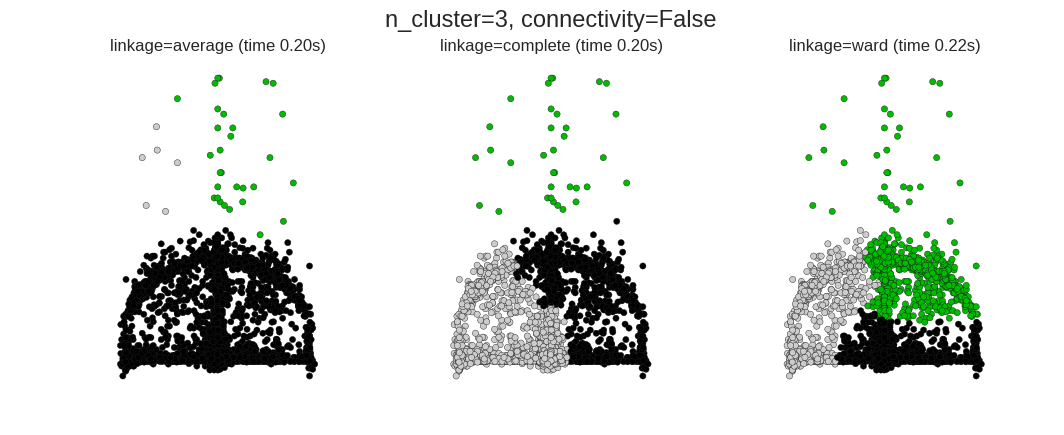

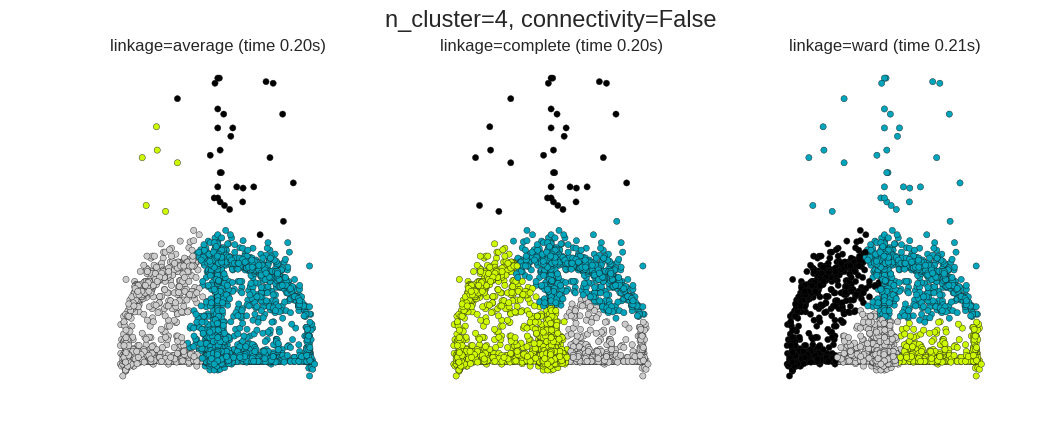

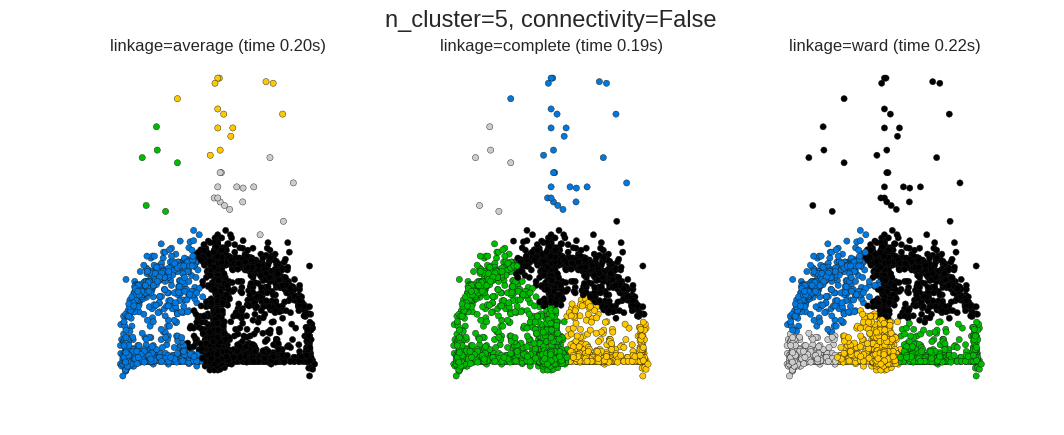

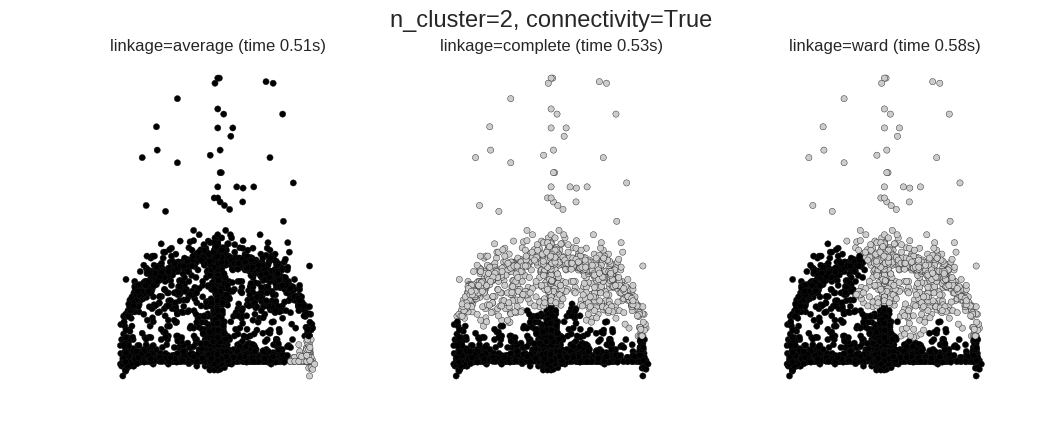

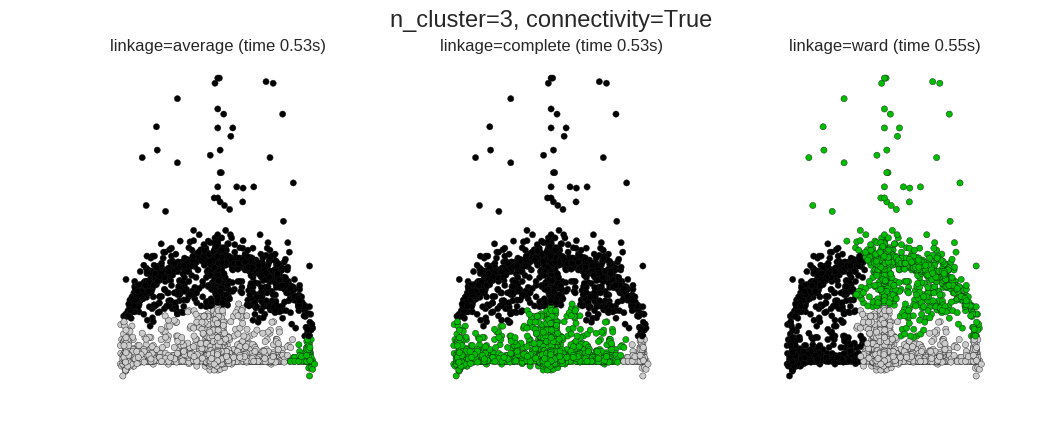

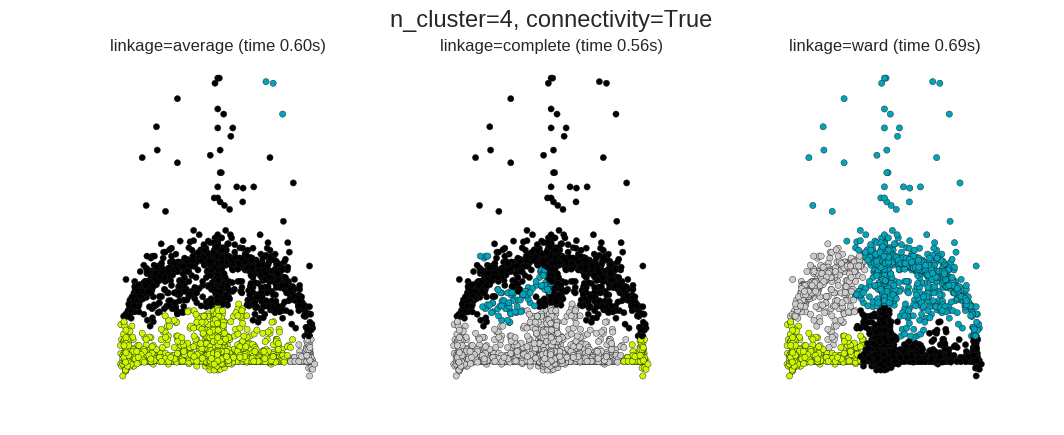

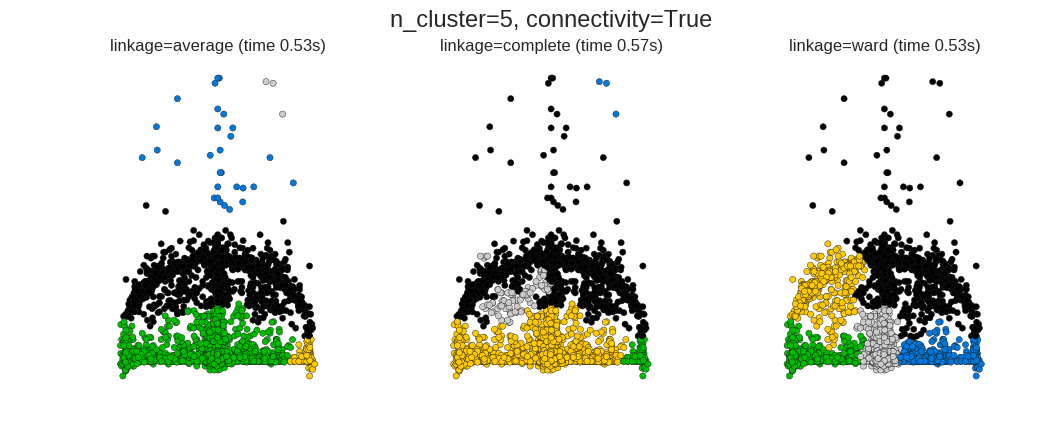

In [30]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

- Polar coordinates
- Try clustering more, different players
- Create cluster from many players, check how far off individual players are from clusters
- Check how close one cluster is from positions' clusters

In [31]:
all_player_ids = nba.get_all_player_ids();

In [44]:
import math

def average_player_by_name(name):
    player_id = nba.get_player_id(name)[0]
    player_shots = nba.Shots(player_id).get_shots()
    print(name, player_shots.LOC_X.mean(), player_shots.LOC_Y.mean()) 
    
def average_player_by_id(player_id):
    player_shots = nba.Shots(player_id).get_shots()
    mean_x = player_shots.LOC_X.mean()
    mean_y = player_shots.LOC_Y.mean()
    dist = math.sqrt(mean_x ** 2 + mean_y ** 2)
    theta = np.arctan(mean_y / mean_x) 
    #print(player_id, player_shots.LOC_X.mean(), player_shots.LOC_Y.mean()) 
    print(player_id, "r: ",dist, "theta: ", theta)
    return([player_id, dist, theta, mean_x, mean_y])


theta = []
r = []
x = []
y = []
positions = []
count = 0
for player in all_player_ids.PERSON_ID:
    player_id, _theta, _r, _x, _y = average_player_by_id(player)
    if math.isnan(_theta):
        continue
    theta.append(_theta)
    r.append(_r)
    x.append(_x)
    y.append(_y)
    count += 1
    if count > 50:
        break

print(theta)
print(r)
print(x)
print(y)

(1505, 'r: ', nan, 'theta: ', nan)
(949, 'r: ', nan, 'theta: ', nan)
(203518, 'r: ', 136.42581777041053, 'theta: ', -1.4605152674195014)
(101165, 'r: ', nan, 'theta: ', nan)
(203112, 'r: ', 101.75212247941437, 'theta: ', -1.4515395972441398)
(200801, 'r: ', nan, 'theta: ', nan)
(203919, 'r: ', nan, 'theta: ', nan)
(203500, 'r: ', 27.095413986917208, 'theta: ', -1.5317950243825185)
(202399, 'r: ', nan, 'theta: ', nan)
(201167, 'r: ', 94.31673287266285, 'theta: ', 1.4710171509762267)
(200772, 'r: ', nan, 'theta: ', nan)
(201336, 'r: ', nan, 'theta: ', nan)
(201582, 'r: ', 67.99269981125013, 'theta: ', 1.4282799614576787)
(203006, 'r: ', nan, 'theta: ', nan)
(202374, 'r: ', nan, 'theta: ', nan)
(203128, 'r: ', nan, 'theta: ', nan)
(202332, 'r: ', 20.561250159280032, 'theta: ', -1.2740852607521049)
(200746, 'r: ', 72.77941483980584, 'theta: ', -1.3191494862152697)
(1626146, 'r: ', nan, 'theta: ', nan)
(724, 'r: ', nan, 'theta: ', nan)
(2042, 'r: ', nan, 'theta: ', nan)
(201570, 'r: ', nan,

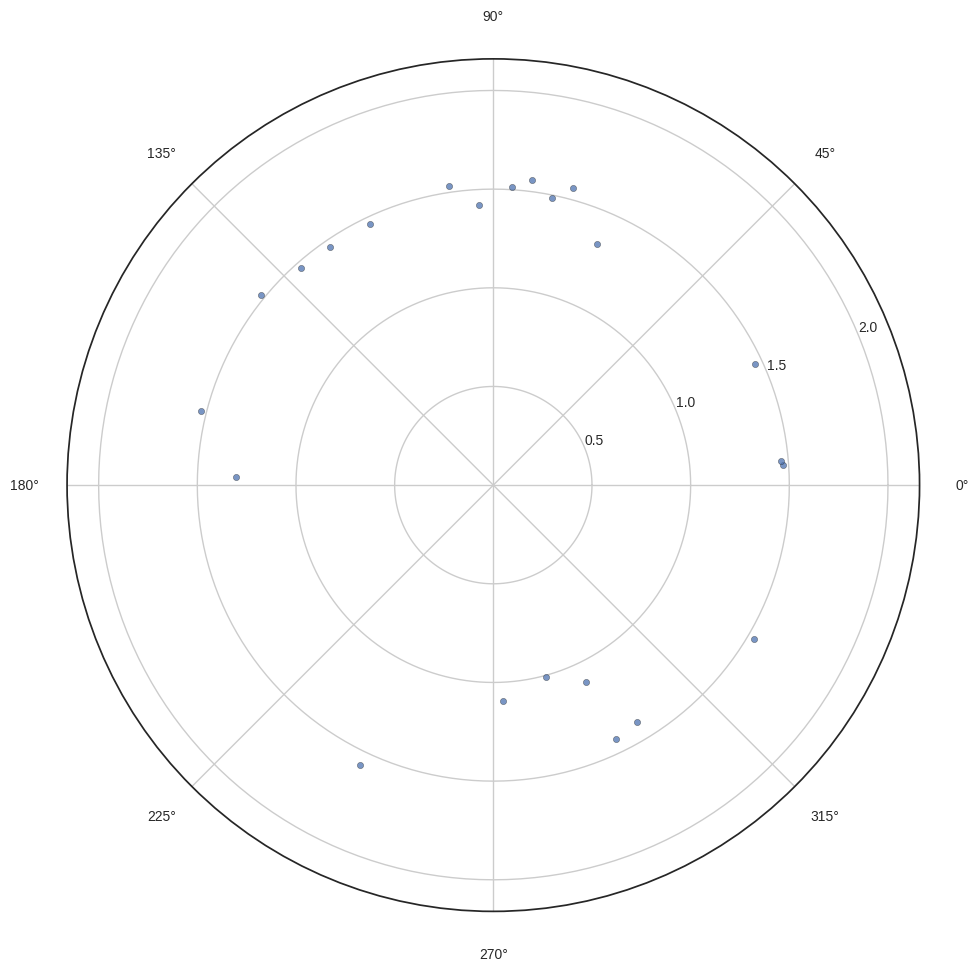

[-15.014705882352942, -12.105882352941176, -1.0564885496183205, 9.395238095238096, 9.657303370786517, -6.011627906976744, -18.122020972354623, 5.648809523809524, 13.721008403361344, 3.347639484978541, 32.81818181818182, -13.15, -10.416856492027335, 7.052884615384615, 5.632600258732213, -18.82034976152623, -3.7588192944564436, -7.0, 50.338770388958594, 1.558139534883721, 1.7846153846153847, -5.615087040618955, -19.434163701067614, -16.47222222222222, -12.052173913043479, -33.03061224489796, 1.1807580174927115, -4.448788115715403, -3.6292372881355934, -7.692192192192192, 0.043010752688172046, 6.14974358974359, -13.3125, -4.422939068100359, 9.452646239554317, -3.374242424242424, -18.63013698630137, 1.7167487684729064, 20.754071661237784, -8.959183673469388, 10.33125, -7.163043478260869, -42.333333333333336, 7.94017094017094, 23.733826247689464, 2.8731563421828907, -15.084269662921349, -0.3673469387755102, 8.901353965183752, 10.377962085308058, -5.604938271604938]


In [45]:
#player_id, theta, r = average_player_by_id(all_player_ids.PERSON_ID[2])
ax = plt.subplot(projection='polar')
c = ax.scatter(theta, r, cmap='hsv', alpha=0.75)
plt.show()
print(x)

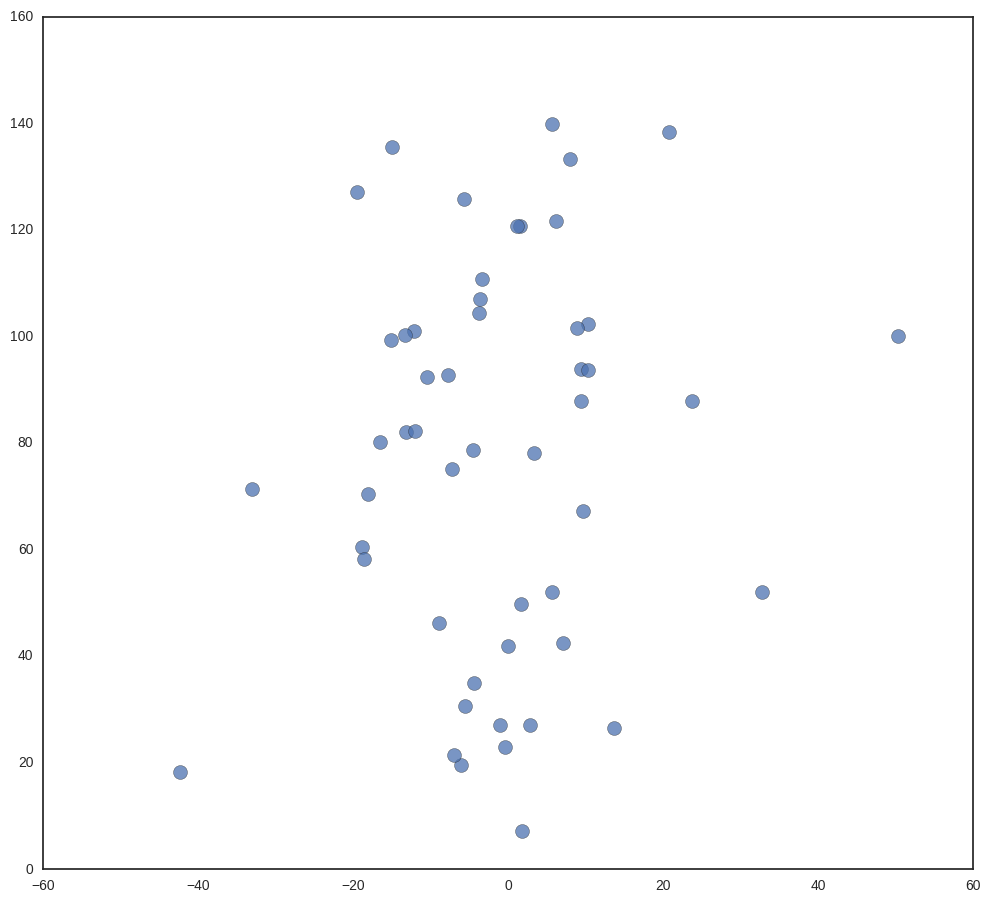

In [79]:
#cartesian version for comparison
ax = plt.subplot()
c = ax.scatter(x, y, cmap='hsv', alpha=0.75, s= 100)
plt.show()

#use this http://scikit-learn.org/stable/modules/clustering.html

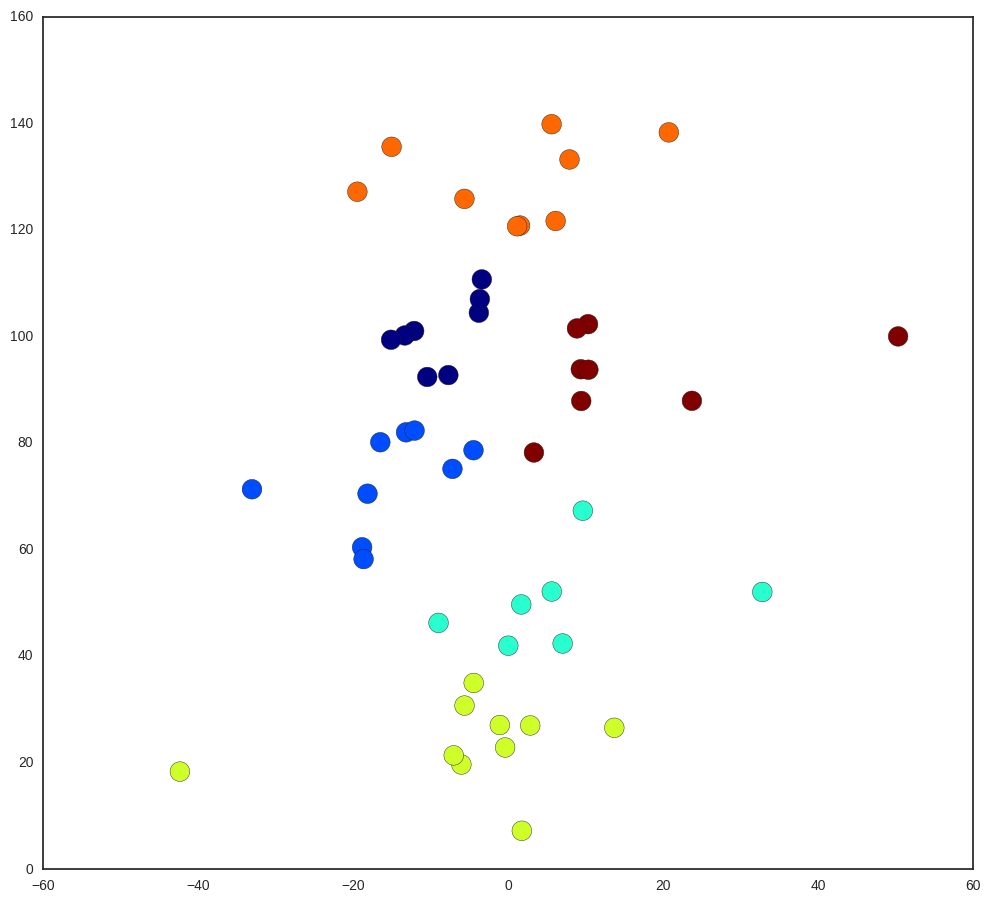

what


In [78]:
import sklearn
from random import randint

d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)
model = sklearn.cluster.AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, 
                                            preference=None, affinity='euclidean', verbose=False)
predicted = model.fit_predict(df)
plt.scatter(x, y, c=predicted, cmap='jet',s=200)
plt.show()
print("what")

[2, 3, 3, 1, 1, 4, 0, 4, 0, 3, 2, 1, 2, 2, 3, 3, 3, 2, 1, 2, 1, 3, 4, 2, 2, 4, 4, 3, 0, 3, 3, 2, 1, 2, 0, 3, 1, 0, 1, 3, 4, 1, 1, 2, 1, 4, 0, 2, 4, 1, 0]
(51, 3)


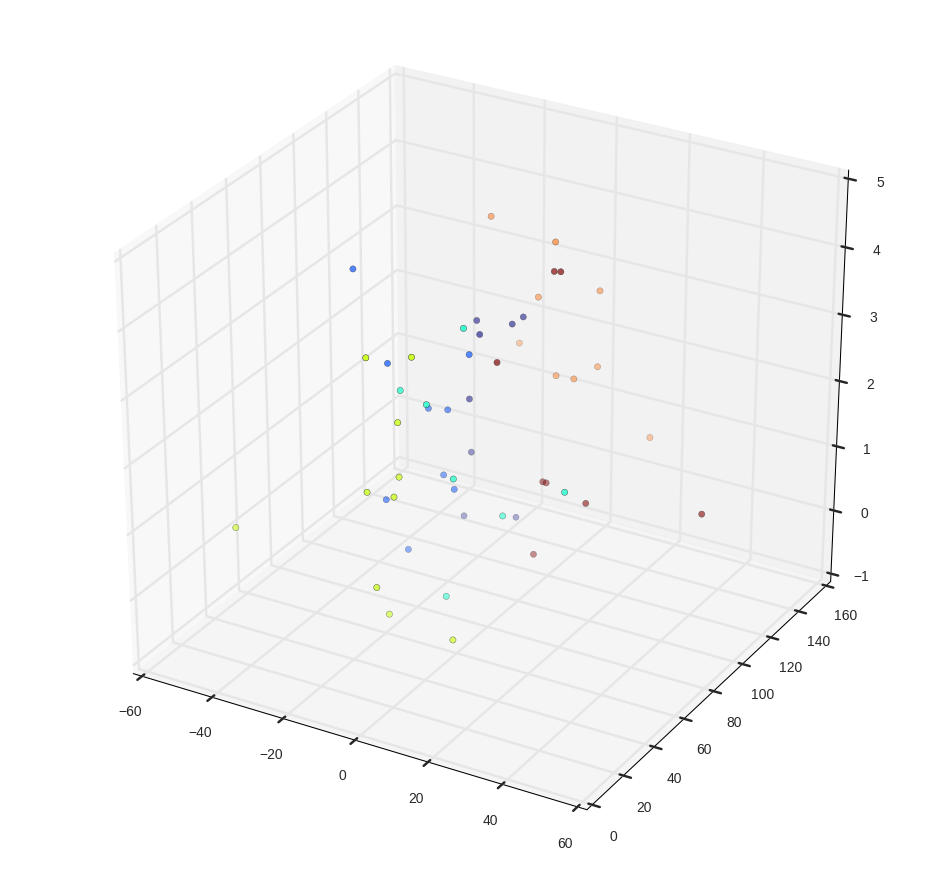

In [73]:
#this is wrong

import sklearn
from random import randint
from mpl_toolkits.mplot3d import Axes3D

labels = []
for i in range(51):
    labels.append(randint(0, 4))
print labels
d = {'x': x, 'y': y, 'label':labels}
df = pd.DataFrame(data=d)
model = sklearn.cluster.AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, 
                                            preference=None, affinity='euclidean', verbose=False)
predicted = model.fit_predict(df)
ax = plt.axes(projection='3d')
print(df.shape)
ax.scatter(x, y, labels, c=predicted, cmap='jet')
#ax.view_init(10, -60)
#print(df)

TypeError: object of type 'numpy.float64' has no len()

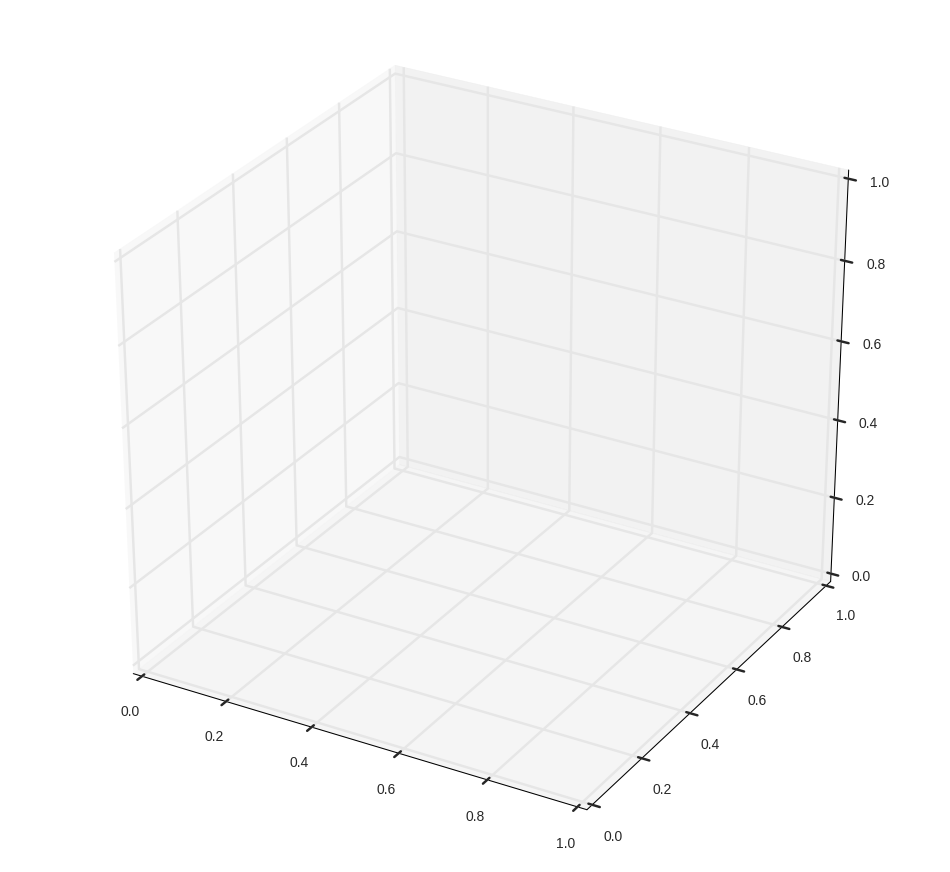

In [68]:
#Polar attempt. Also wrong

from numpy import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

d = {'r': r, 'theta': theta, 'label':labels}
df = pd.DataFrame(data=d)
model = sklearn.cluster.AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, 
                                            preference=None, affinity='euclidean', verbose=False)
predicted = model.fit_predict(df)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(51):
    ax.plot(r[i], theta[i], labels[i])
plt.show()

In [85]:
howard_id = nba.get_player_id("Howard, Dwight")
howard = nba.Shots(howard_id)
print(howard.)
#print(howard.player_position)